### Subir a tu github una implementación personalizada de NLTK para CountVectorizer que haga steam y stopwords del idioma español y dos ejemplos de oraciones usando tu clase. También importá un corpus como 20_Newsdataset pero que esté en español. Qué corpus poner, queda a tu criterio!

Creo mi clase personalizada que combina tecnicas de NLTK + SciKit-learn para español

In [9]:
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

spanish_stemmer = SnowballStemmer("spanish")

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (spanish_stemmer.stem(w) for w in analyzer(doc))
    
stem_vectorizer = StemmedCountVectorizer(min_df=1, stop_words=stopwords.words("spanish"))
stem_analyze = stem_vectorizer.build_analyzer()

Hacemos pruebas con 2 oraciones en español

In [15]:
test1 = stem_analyze("Si hago todos los laboratorios tengo mas chance de aprobar la materia.")
for tok in test1:
    print(tok)

si
hag
laboratori
mas
chanc
aprob
materi


In [16]:
test1 = stem_analyze("Dos cosas son infinitas: el universo y la estupidez humana. Y no estoy seguro sobre la primera")
for tok in test1:
    print(tok)

dos
cos
infinit
univers
estupidez
human
segur
primer


Para la segunda parte me bajo un corpora en formato xml acerca de distintios discursos politicos de un ex presidente colombiano. Lo convierto a una lista de strings.

In [18]:
import xml.etree.ElementTree as ET

f = open("alvaroCorpora.xml")
xml = f.read()
f.close()
tree = ET.fromstring(xml)
discursos = [discurso.text for discurso in tree.findall("*/discurso")]

Luego creo una instancia de CountVectorizer para poder preprocesar el corpora

In [57]:
vectorizer = CountVectorizer()
fit = vectorizer.fit_transform(discursos)

Puedo averiguar la cantidad de features...

In [58]:
len(vectorizer.get_feature_names())

26345

...o la frecuencia de la palabra colombia

In [59]:
vectorizer.vocabulary_.get("colombia")

5291

Tambien podemos crear un grafico que indique la ocurrencia de cada palabra

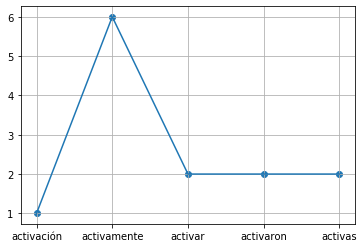

In [74]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

x = vectorizer.get_feature_names()[1000:1005] # mostramos solo una pequeña muestra por simplicidad
y = fit.toarray().sum(axis=0)[1000:1005]

plt.scatter(x, y)
plt.plot(x, y)
plt.grid(True)
plt.show()